In [1]:
import numpy as np
import matplotlib.pyplot as plt
import time
import pylab as pl
import importlib
from IPython import display
from lib import util
from copy import deepcopy
%matplotlib inline
from lib import frame_util as futil
importlib.reload(futil)

<module 'lib.frame_util' from 'C:\\Users\\Alex Lin\\Documents\\CS229\\Project\\cs229_merging\\lib\\frame_util.py'>

In [ ]:
vidDict = futil.LoadDictFromTxt("res/101_trajectories/aug_trajectories-0750am-0805am.txt", 'vid')

In [2]:
frameDict = futil.LoadDictFromTxt("res/101_trajectories/aug_trajectories-0750am-0805am.txt", 'frame')

In [3]:
grids = futil.GetGridsFromFrameDict(frameDict)

KeyboardInterrupt: 

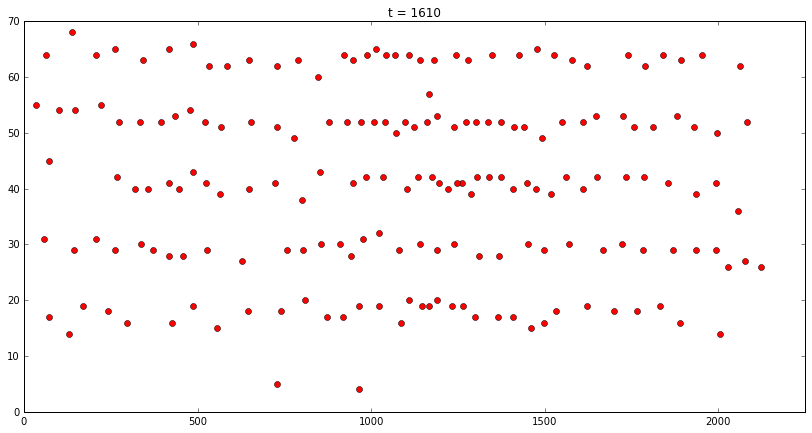

In [5]:
print(len(grids))
futil.AnimateFrames(frameDict)

In [ ]:
#[VID, FID, totalF, globaltime, localX, localY, globalX, globalY, \
#vehicleLength, vehicleWidth, vehicleClass, vVelocity, vAccel, laneID\
#precedingVID, followingVID, spacingFt, headwayFt]

In [ ]:
#With a loaded frameDict, animates frames.
fig_size = plt.rcParams["figure.figsize"]
 
# Prints: [8.0, 6.0]
print("Current size:", fig_size)
 
# Set figure width to 12 and height to 9
fig_size[0] = 14
fig_size[1] = 7
plt.rcParams["figure.figsize"] = fig_size
plt.figure(1)

for i in range(int(len(frameDict)/2)):
    curFrame = frameDict[100 + i*5]
    plotFrame(curFrame)
    plt.clf()


    

In [ ]:
def plotFrame(curFrame):
    x,y = getFramePoints(curFrame)    
    plt.plot(y,70 - x, 'ro')
    plt.title("t = " + str(i))
    plt.axis([0, 2250, 0, 70])
    display.clear_output(wait=True)
    display.display(pl.gcf())
    #plt.show()


In [ ]:
def getFramePoints(curFrame):
    x = np.array([0]*len(curFrame))
    y = np.array([0]*len(curFrame))
    entryCounter = 0
    for entry in curFrame:
        x[entryCounter] = float(curFrame[entry][4])
        y[entryCounter] = float(curFrame[entry][5])
        entryCounter += 1
    return x,y

In [ ]:
from lib import vehicleclass as v
import importlib
importlib.reload(v)

In [ ]:
MAX_X = 70
MAX_Y = 2250
X_DIV = 35
Y_DIV = 200
X_STEP = float(MAX_X/X_DIV)
Y_STEP = float(MAX_Y/Y_DIV)
def FrameToGrid(frame):
    #features = x, y, vx, vy, ax, ay
    grid = np.zeros((X_DIV + 2, Y_DIV + 2, 6))
    for vid in frame:
        vehicleData = frame[vid]
        veh = v.vehicle(vehicleData)
        gridX = int(veh.getX() / X_STEP)
        gridY = int(veh.getY() / Y_STEP)
        #print(veh.getX(), gridX, veh.getY(), gridY)
        grid[gridX][gridY] = veh.getTrajectory()
        #print(gridX, gridY)
    return grid

In [ ]:
from lib import vehicleclass as v

importlib.reload(v)
g = FrameToGrid(frameDict[150])

print(g.shape)
print(g)


In [ ]:
def GetGridsFromFrameDict(frameDict):
    gridDict = {}
    for i in frameDict:
        frame = frameDict[i]
        grid = FrameToGrid(frame)
        gridDict[i] = deepcopy(grid)
    return gridDict

In [ ]:
print(frameDict[13])

In [ ]:
gd = GetGridsFromFrameDict(frameDict)

In [ ]:
print(len(gd))

In [ ]:
#print(gd[150])
print(np.sum(gd[150]))
print(gd[150].shape)

In [ ]:
plotFrame(frameDict[150])

In [ ]:
gflat = np.sum(gd[150], axis=2)

In [ ]:
print(gflat.shape)

In [ ]:
gflat[gflat != 0]

In [ ]:
gflat = np.sum(grid, axis=2)
nz = np.nonzero(gflat)
nzx = nz[0]*X_STEP
nzy = nz[1]*Y_STEP
plt.axis([0, 2250, -70, 0])
plt.plot(nzy, -nzx, 'ro')
plt.show()


In [ ]:
plotFrame(frameDict[150])

In [ ]:
from lib import frame_util as futil
importlib.reload(futil)
futil.AnimateFrames(frameDict)